In [ ]:
import pandas as pd
df_reviews = pd.read_csv("reviews.csv")
#dataset con reviews de tripadvisor y otras plataformas
print(df_reviews.shape)

(100836, 13)


In [ ]:
df_reviews.head()

,_id,content,user,date,id,rate,reate_text,scraper_id,source,tags,title,url,label
0,5e806e013e16bddb6c1ef46c,\n \n Imposible de hinchar\n ...,Stephane,01/02/2020,NaN,0.2,1/5,NaN,decathlon,NaN,\n \n Imposible de hinchar\n ...,NaN,negative
1,5e806e013e16bddb6c1ef46f,\n \n No hay rebaja.\n ...,Nieves,08/01/2020,NaN,0.2,1/5,NaN,decathlon,NaN,\n \n No hay rebaja.\n ...,NaN,negative
2,5e806e133e16bddb6c1ef633,\n \n Estas gafas no cumplen c...,Antonio,25/02/2020,NaN,0.2,1/5,NaN,decathlon,NaN,\n \n Estas gafas no cumplen c...,NaN,negative
3,5e806e203e16bddb6c1ef733,\n \n Jamais été livré\n ...,Thomas,30/08/2019,NaN,0.2,1/5,NaN,decathlon,NaN,\n \n Jamais été livré\n ...,NaN,negative
4,5e806e2a3e16bddb6c1ef7ed,\n \n DYSFONCTIONNEMENT et DUR...,Urbano,19/12/2019,NaN,0.2,1/5,NaN,decathlon,NaN,\n \n DYSFONCTIONNEMENT et DUR...,NaN,negative


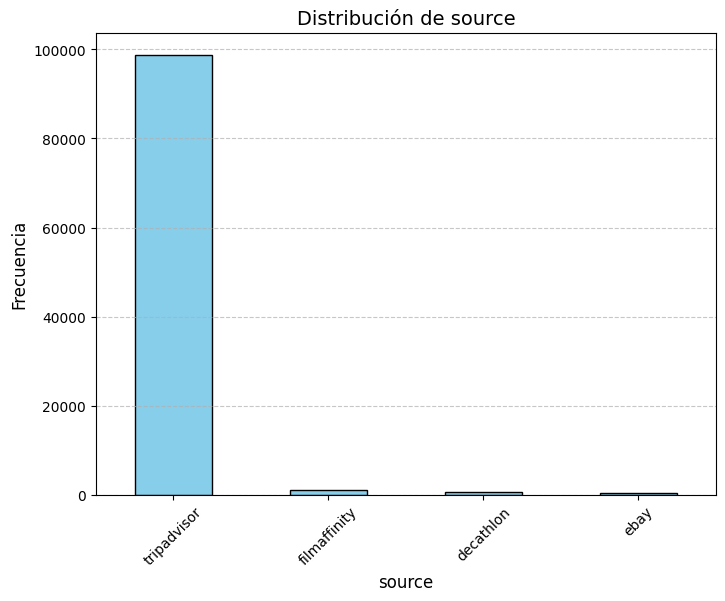

In [ ]:
import matplotlib.pyplot as plt

def plot_categorical_column(df, column_name):
    """
    Grafica en forma de barra una columna categórica de un DataFrame.

    Parameters:
        df (pd.DataFrame): El DataFrame que contiene los datos.
        column_name (str): El nombre de la columna categórica a graficar.
    """
    value_counts = df[column_name].value_counts()
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Distribución de {column_name}", fontsize=14)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_categorical_column(df_reviews, "source")#numero de reviews por plataforma

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
pip install Unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from unidecode import unidecode

# Funcion para elimintar acentos
def remove_accents(text):
    if isinstance(text, str):
        return unidecode(text)
    else:
        return text

#Funcion para eliminar signos de puntuacion
def remove_punctuation(text):
  tokenizer = RegexpTokenizer(r'\w+')
  local_tokens = tokenizer.tokenize(text)
  return " ".join(local_tokens)

def process_text(text):
    text = text.lower()
    text = re.sub(r"'[^\w\s]'","",text)
    text = re.sub("\n","",text)#remove lines separate
    return text

#Funcion para elimintar stopwords (articulos, pronombres, etc)
def remove_stopwords(text):
  stop_words_list = stopwords.words('spanish')
  tokens = text.split(" ")
  tokens = [token for token in tokens if token not in stop_words_list]#remove stopwords
  return " ".join(tokens)

In [ ]:
#Eliminación de stopworlds, urls, hashtags, emoticones, acentos, signos de puntuación
df_reviews["content_filtered"] = df_reviews["content"].apply(process_text)
df_reviews["content_filtered"] = df_reviews["content_filtered"].apply(remove_stopwords)
df_reviews["content_filtered"] = df_reviews["content_filtered"].apply(remove_punctuation)
df_reviews["content_filtered"] = df_reviews["content_filtered"].apply(remove_accents)

In [ ]:
df_reviews["content_filtered"].head()

,content_filtered
0,imposible hinchar hola stephane puedes inflar ...
1,rebaja rebaja falsa normalmente acuerdo relaci...
2,gafas cumplen expectativas agradecemos deposit...
3,jamais ete livre j ai commande ce telemetre su...
4,dysfonctionnement et duree d utilisation bonjo...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corpus = df_reviews["content_filtered"].values
#corpus es una lista de comentarios
labels = df_reviews["label"].values
#etiquetas por cada comentario

#espacio de caracteristicas
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,2))
#Modelo TfIdf convertira la lista de comentarios en una matriz
document_term_matrix = tfidf.fit_transform(corpus)
#Matriz documento-termino, cada fila representa un comentario y cada columna una caracteristica (palabra)
#se retienen las 5000 principales palabras
print(document_term_matrix.shape)
#reduccion de dimensionalidad
pca_tuned = PCA(n_components=300)
#encuentra las componentes principales de la matriz
pca_tuned.fit(document_term_matrix.toarray())
document_term_matrix_reduced = pca_tuned.transform(document_term_matrix.toarray())
#Matriz documento-termino con dimensionalidad reducidad, se ha retenido las primeras 300 componentes principales

(100836, 5000)


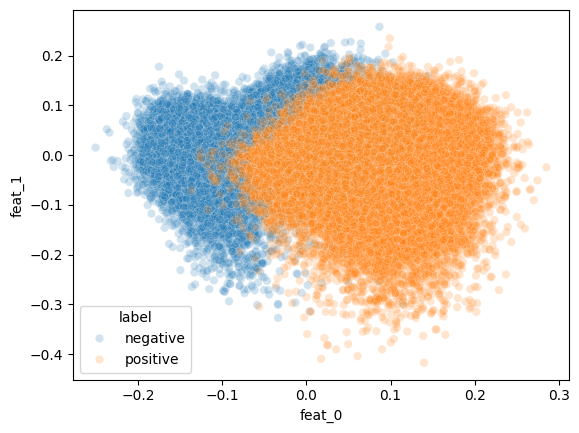

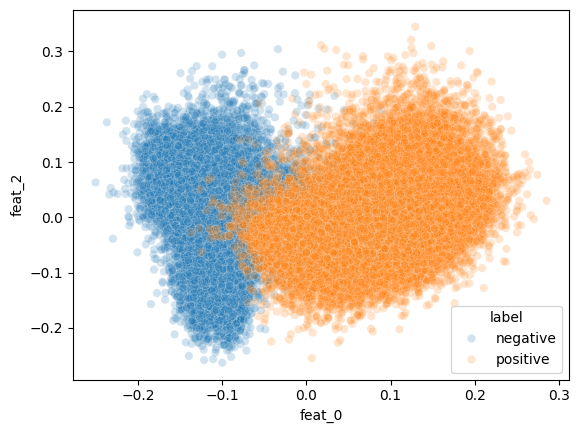

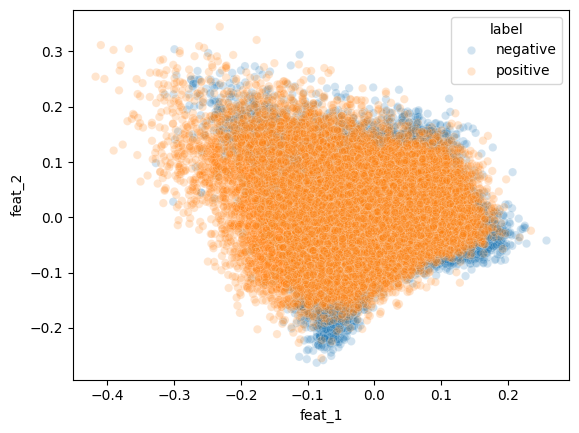

In [ ]:
#Se crea un dataframe con la matriz documento-termino con dimensionalidad reducidad
columns = [ "feat_"+str(i) for i in range(0,pca_tuned.n_components_) ]# nombre de las columnas

df_pca = pd.DataFrame(data=document_term_matrix_reduced,columns=columns)
df_pca["label"] = labels
#scatterplo componentes principal uno vs componente principal dos
sns.scatterplot(x="feat_0",y="feat_1",hue="label",data=df_pca,alpha=0.2)
plt.show()
#scatterplo componentes principal uno vs componente principal tres
sns.scatterplot(x="feat_0",y="feat_2",hue="label",data=df_pca,alpha=0.2)
plt.show()
#scatterplo componentes principal dos vs componente principal tres
sns.scatterplot(x="feat_1",y="feat_2",hue="label",data=df_pca,alpha=0.2)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

#Entrenamiento del modulo
X = df_pca.iloc[:,0:-1].values #matriz document term con dimensionalidad reducidad
y = df_pca["label"].values #vector de etiquetas 'positive' se refiere a comentarios positivos y 'negative' a comentarios negativos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)
#Se divide la matriz y vector de etiquetas en dos grupos: Testing set y training set

#Algoritmo de Machine Learning para aprender sobre los datos
model = GaussianNB()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(100*score)#porcentaje de presicion
#y_test = ['negative','positive','positive','positive','negative']
#y_predicted = ['negative','positive','positive','negative','negative']

92.8386825339584


In [ ]:
#pruebas
query_text="este hotel esta demasiado aburrido y la atencion es mala"
vector = tfidf.transform([query_text])
vector_r = pca_tuned.transform(vector.toarray())
prediction = model.predict(vector_r)
prediction

array(['negative'], dtype='<U8')

In [ ]:
#pruebas
query_texts=[
    "la atencion en este sitio es mala ya quiero volver a casa",
    "eficiente y comodo",
    "Cálida bienvenida, personal eficiente",
    "este sitio es muy bueno y la atencion es de lo mejor",
    "la atencion en este sitio es mala ya quiero volver a casa",
    "espero nunca jamas volver a un lugar tan despreciable y triste como este",
    "Me encanta este producto, es realmente fantástico.",
    "Estoy muy decepcionado con el servicio.",
    "La película fue bastante aburrida.",
    "¡Qué experiencia tan increíble!",
    "No volveré a comprar aquí, pésima atención al cliente."
]

vector = tfidf.transform(query_texts)
#El arreglo de comentarios para probar tienen que se transformado por las mismas operaciones que en lase de entrenamiento
vector_r = pca_tuned.transform(vector.toarray())
prediction = model.predict(vector_r)
for i,query_text in enumerate(query_texts):
  print(query_text,prediction[i])

la atencion en este sitio es mala ya quiero volver a casa negative
eficiente y comodo positive
Cálida bienvenida, personal eficiente positive
este sitio es muy bueno y la atencion es de lo mejor negative
la atencion en este sitio es mala ya quiero volver a casa negative
espero nunca jamas volver a un lugar tan despreciable y triste como este negative
Me encanta este producto, es realmente fantástico. negative
Estoy muy decepcionado con el servicio. negative
La película fue bastante aburrida. negative
¡Qué experiencia tan increíble! negative
No volveré a comprar aquí, pésima atención al cliente. negative
